In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [254]:
times = pd.read_csv('./df_times.csv')
jogadores = pd.read_csv('./dfPlayers.csv')

### Times

In [255]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  460 non-null    int64  
 1   statistics  460 non-null    object 
 2   pos         460 non-null    int64  
 3   time        460 non-null    object 
 4   valor       460 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 18.1+ KB


In [256]:
times[times['statistics'] == 'bigChances']

,Unnamed: 0,statistics,pos,time,valor
100,100,bigChances,1,Palmeiras,100.0
101,101,bigChances,2,Flamengo,84.0
102,102,bigChances,3,Athletico,82.0
103,103,bigChances,4,Grêmio,79.0
104,104,bigChances,5,Red Bull Bragantino,75.0
105,105,bigChances,6,Fluminense,74.0
106,106,bigChances,7,Atlético Mineiro,74.0
107,107,bigChances,8,Botafogo,74.0
108,108,bigChances,9,São Paulo,70.0
109,109,bigChances,10,Vasco da Gama,70.0


In [257]:
times[times['statistics'] == 'bigChancesMissed']

,Unnamed: 0,statistics,pos,time,valor
120,120,bigChancesMissed,1,Palmeiras,60.0
121,121,bigChancesMissed,2,Cruzeiro,53.0
122,122,bigChancesMissed,3,Flamengo,49.0
123,123,bigChancesMissed,4,Grêmio,47.0
124,124,bigChancesMissed,5,Athletico,45.0
125,125,bigChancesMissed,6,Fluminense,43.0
126,126,bigChancesMissed,7,Vasco da Gama,43.0
127,127,bigChancesMissed,8,Red Bull Bragantino,43.0
128,128,bigChancesMissed,9,Bahia,42.0
129,129,bigChancesMissed,10,Fortaleza,42.0


Hipotese 1:

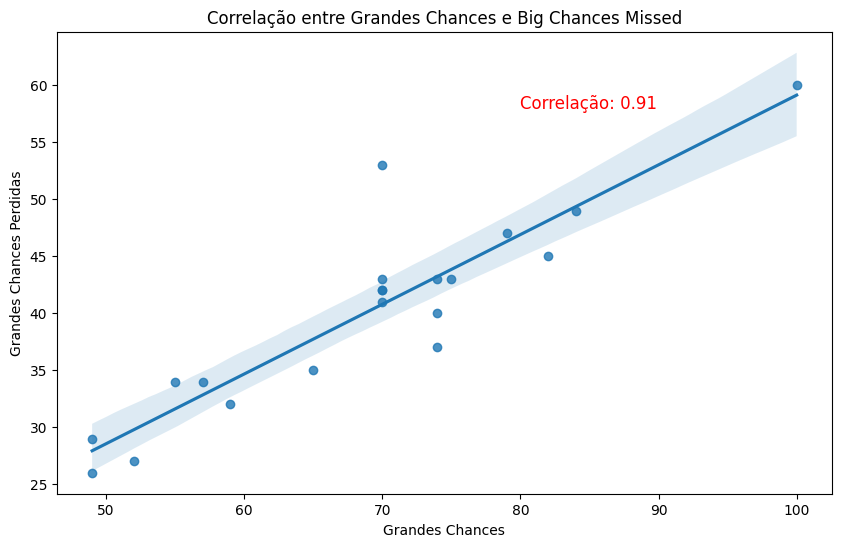

In [258]:
pivoted_times = times.pivot_table(index='time', columns='statistics', values='valor').reset_index()

correlation = pivoted_times['bigChances'].corr(pivoted_times['bigChancesMissed'])

# Criar o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='bigChances', y='bigChancesMissed', data=pivoted_times)

# Adicionar título e rótulos aos eixos
plt.title('Correlação entre Grandes Chances e Big Chances Missed')
plt.xlabel('Grandes Chances')
plt.ylabel('Grandes Chances Perdidas')

plt.text(max(pivoted_times['bigChances']) - 20, max(pivoted_times['bigChancesMissed']) - 2, f'Correlação: {correlation:.2f}', fontsize=12, color='red')


plt.show()



Na analise feita através do grafico mostrado acima, podemos ter uma grande compreensao dos dados dos 20 times da serie A do brasileirão 2023.
onde foi realizada uma analise comparativa dentre as grandes chances criadas dentre cada um deles e suas porcentagens de aproveitamento nessas grandes chances criadas e suas correlações.


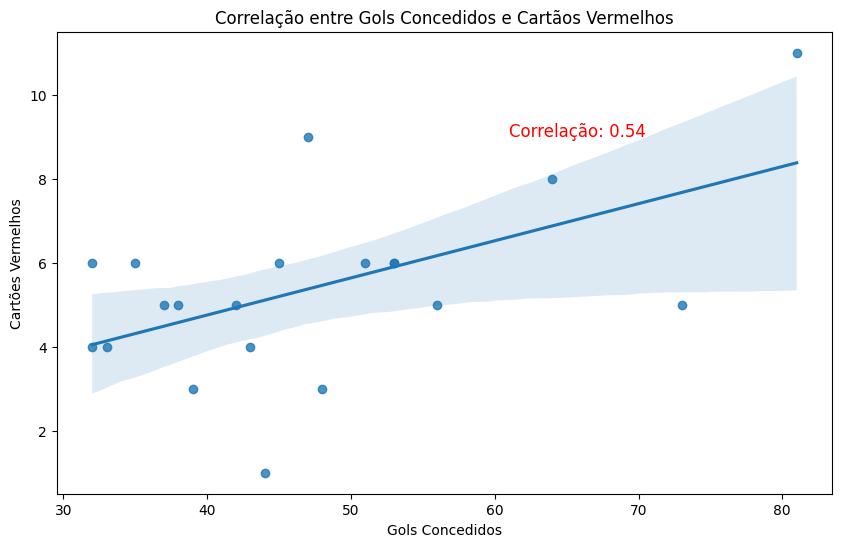

In [259]:
pivoted_times = times.pivot_table(index='time', columns='statistics', values='valor').reset_index()

correlation = pivoted_times['goalsConceded'].corr(pivoted_times['redCards'])

# Criar o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='goalsConceded', y='redCards', data=pivoted_times)

# Adicionar título e rótulos aos eixos
plt.title('Correlação entre Gols Concedidos e Cartãos Vermelhos')
plt.xlabel('Gols Concedidos')
plt.ylabel('Cartões Vermelhos')

plt.text(max(pivoted_times['goalsConceded']) - 20, max(pivoted_times['redCards']) - 2, f'Correlação: {correlation:.2f}', fontsize=12, color='red')


plt.show()

foi feita uma analise comparativa sobre as porcentagem de cartoes recebidos pelas equipes da serie A do campeonato brasileiro. e suas devidas correlações.

### Jogadores

In [260]:
jogadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  29 non-null     object
 1   p1          29 non-null     object
 2   p2          29 non-null     object
 3   p3          29 non-null     object
 4   topPlayers  29 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [261]:
jogadores.head()

,Unnamed: 0,p1,p2,p3,topPlayers
0,accurateLongBalls,164 - Rafinha (São Paulo),144 - L. Garcia (Palmeiras),117 - L. Ortiz (Red Bull Bragantino),"[{'statistics': {'accurateLongBalls': 164, 'id..."
1,accuratePasses,2348 - André (Fluminense),1497 - L. Beraldo (São Paulo),1562 - Nino (Fluminense),"[{'statistics': {'accuratePasses': 2348, 'accu..."
2,assists,11 - Hulk (Atlético Mineiro),11 - L. Suárez (Grêmio),8 - Gerson (Flamengo),"[{'statistics': {'assists': 11, 'id': 996553, ..."
3,bigChancesCreated,13 - Hulk (Atlético Mineiro),13 - Eduardo (Botafogo),12 - Raphael Veiga (Palmeiras),"[{'statistics': {'bigChancesCreated': 13, 'id'..."
4,bigChancesMissed,15 - Paulinho (Atlético Mineiro),14 - L. Suárez (Grêmio),13 - Pablo Vegetti (Vasco da Gama),"[{'statistics': {'bigChancesMissed': 15, 'id':..."


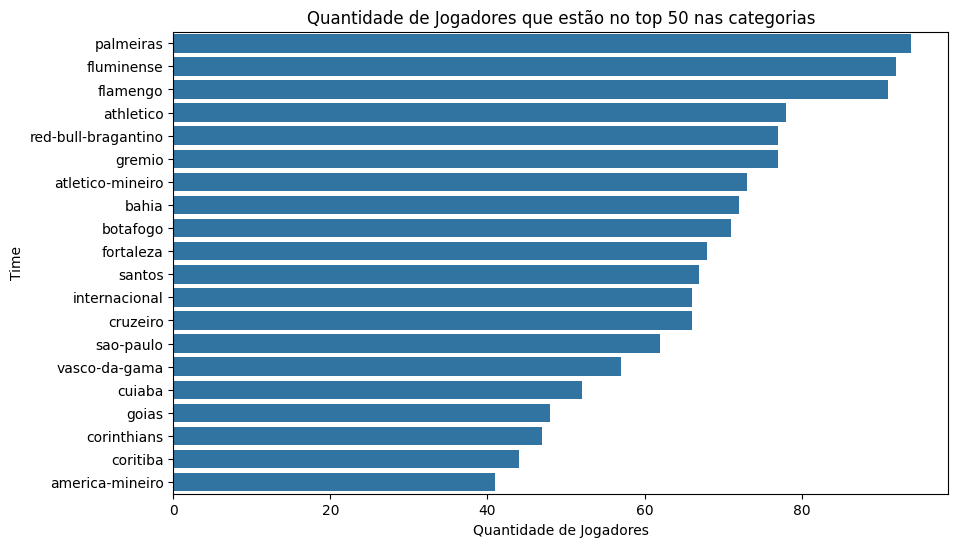

In [262]:
time_qtd: dict[str, int] = {}

for jogadorEstatitiscaGeral in jogadores['topPlayers']:
    jogadorEstatitiscaGeral = eval(jogadorEstatitiscaGeral)
    for jogador in jogadorEstatitiscaGeral:
        team = jogador['team']['slug']
        if team in time_qtd:
            time_qtd[team] += 1
        else:
            time_qtd[team] = 1

# Ordenar o dicionário
time_qtd = dict(
    sorted(time_qtd.items(), key=lambda item: item[1], reverse=True))

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(y=list(time_qtd.keys()), x=list(time_qtd.values()))

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Jogadores que estão no top 50 nas categorias')
plt.xlabel('Quantidade de Jogadores')
plt.ylabel('Time')

plt.show()

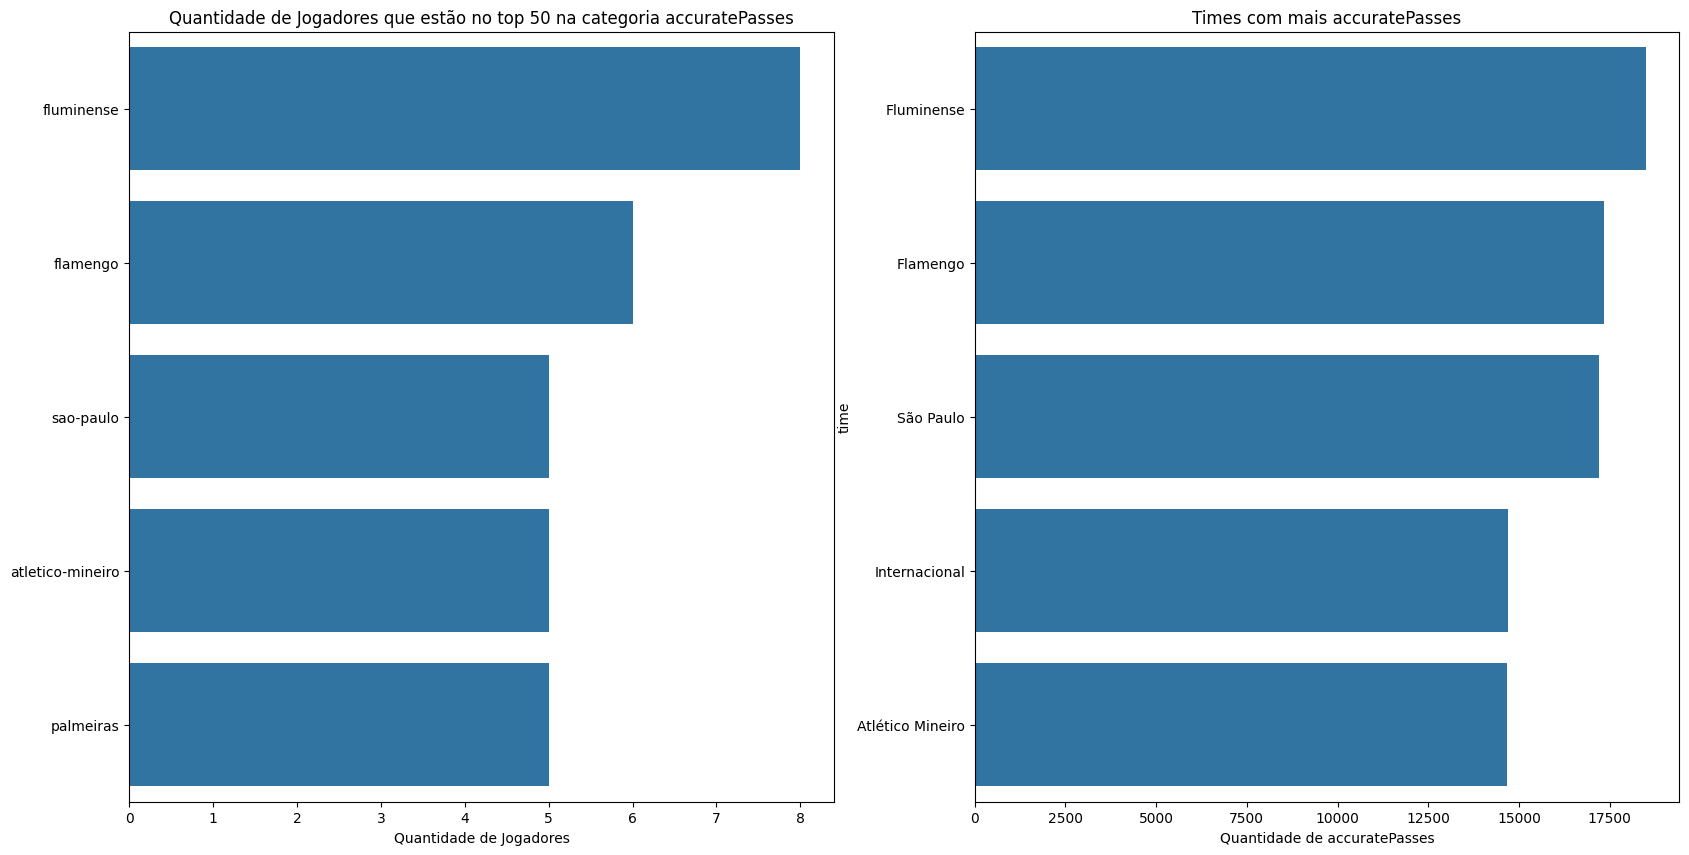

In [267]:
time_qtd_accuratePasses = {}

for jogadorEstatitiscaGeral in jogadores['topPlayers']:
    jogadorEstatitiscaGeral = eval(jogadorEstatitiscaGeral)
    for jogador in jogadorEstatitiscaGeral:
        team = jogador['team']['slug']
        if 'accuratePasses' in jogador['statistics']:
            time_qtd_accuratePasses[team] = time_qtd_accuratePasses.get(team, 0) + 1

# Pegue os 5 primeiros

time_qtd_accuratePasses = dict(sorted(time_qtd_accuratePasses.items(), key=lambda item: item[1], reverse=True)[:5])

# Criar dois graficos de barras
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(y=list(time_qtd_accuratePasses.keys()), x=list(time_qtd_accuratePasses.values()), ax=axs[0])

axs[0].set_title('Quantidade de Jogadores que estão no top 50 na categoria accuratePasses')
axs[0].set_xlabel('Quantidade de Jogadores')

time_accuratePasses = times[times['statistics'] == 'accuratePasses']
time_accuratePasses = time_accuratePasses[['time', 'valor']].sort_values(by='valor', ascending=False)[:5]

sns.barplot(y='time', x='valor', data=time_accuratePasses, ax=axs[1])

axs[1].set_title('Times com mais accuratePasses')
axs[1].set_xlabel('Quantidade de accuratePasses')

plt.show()
